<a href="https://colab.research.google.com/github/U-11-Agar/log_analysis/blob/main/lstm_andanient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sns.set(style='darkgrid', context='talk', palette='rainbow')

In [ ]:
symbol=['ADANIENT.NS']
df=yf.download('ADANIENT.NS',start="2016-01-01")
df.head(20)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,45.553741,49.422543,44.872616,49.095600,47.614208,10963906
2016-01-04,48.768658,50.158157,45.907928,46.371094,44.971909,9408965
2016-01-05,46.670792,48.823151,45.880684,48.278248,46.821514,9801814
2016-01-06,47.951309,48.468964,46.480076,46.997730,45.579643,7093448
2016-01-07,46.262115,46.262115,42.502296,43.564854,42.250347,8919023
2016-01-08,44.681900,45.226803,43.946285,44.681900,43.333683,6409374
2016-01-11,44.136997,45.717213,42.992706,44.872616,43.518646,7610929
2016-01-12,44.872616,45.635475,43.319649,44.028019,42.699539,7187524
2016-01-13,44.572922,46.643543,42.066376,44.055264,42.725960,14813664


In [ ]:
df.loc[(df == 0).any(axis=1),'Volume']=df['Volume'].mean()

In [ ]:
# first cheak the data clean hai ki nhi     then my model will be able to predict the open and close for a the next day 
# the variable input to the lstm will be the percentage changes in open and close the std dev for that and the volume pct change

In [ ]:
df[(df == 0).any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [ ]:
data=df
data.info()
# no empty or missing data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1793 entries, 2016-01-01 to 2023-04-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1793 non-null   float64
 1   High       1793 non-null   float64
 2   Low        1793 non-null   float64
 3   Close      1793 non-null   float64
 4   Adj Close  1793 non-null   float64
 5   Volume     1793 non-null   float64
dtypes: float64(6)
memory usage: 98.1 KB


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,45.553741,49.422543,44.872616,49.095600,47.614208,10963906.0
2016-01-04,48.768658,50.158157,45.907928,46.371094,44.971909,9408965.0
2016-01-05,46.670792,48.823151,45.880684,48.278248,46.821514,9801814.0
2016-01-06,47.951309,48.468964,46.480076,46.997730,45.579643,7093448.0
2016-01-07,46.262115,46.262115,42.502296,43.564854,42.250347,8919023.0
...,...,...,...,...,...,...
2023-03-27,1740.650024,1757.400024,1682.000000,1723.050049,1723.050049,5053055.0
2023-03-28,1727.949951,1733.000000,1573.000000,1600.849976,1600.849976,8144878.0
2023-03-29,1602.949951,1756.000000,1591.099976,1740.400024,1740.400024,9332702.0


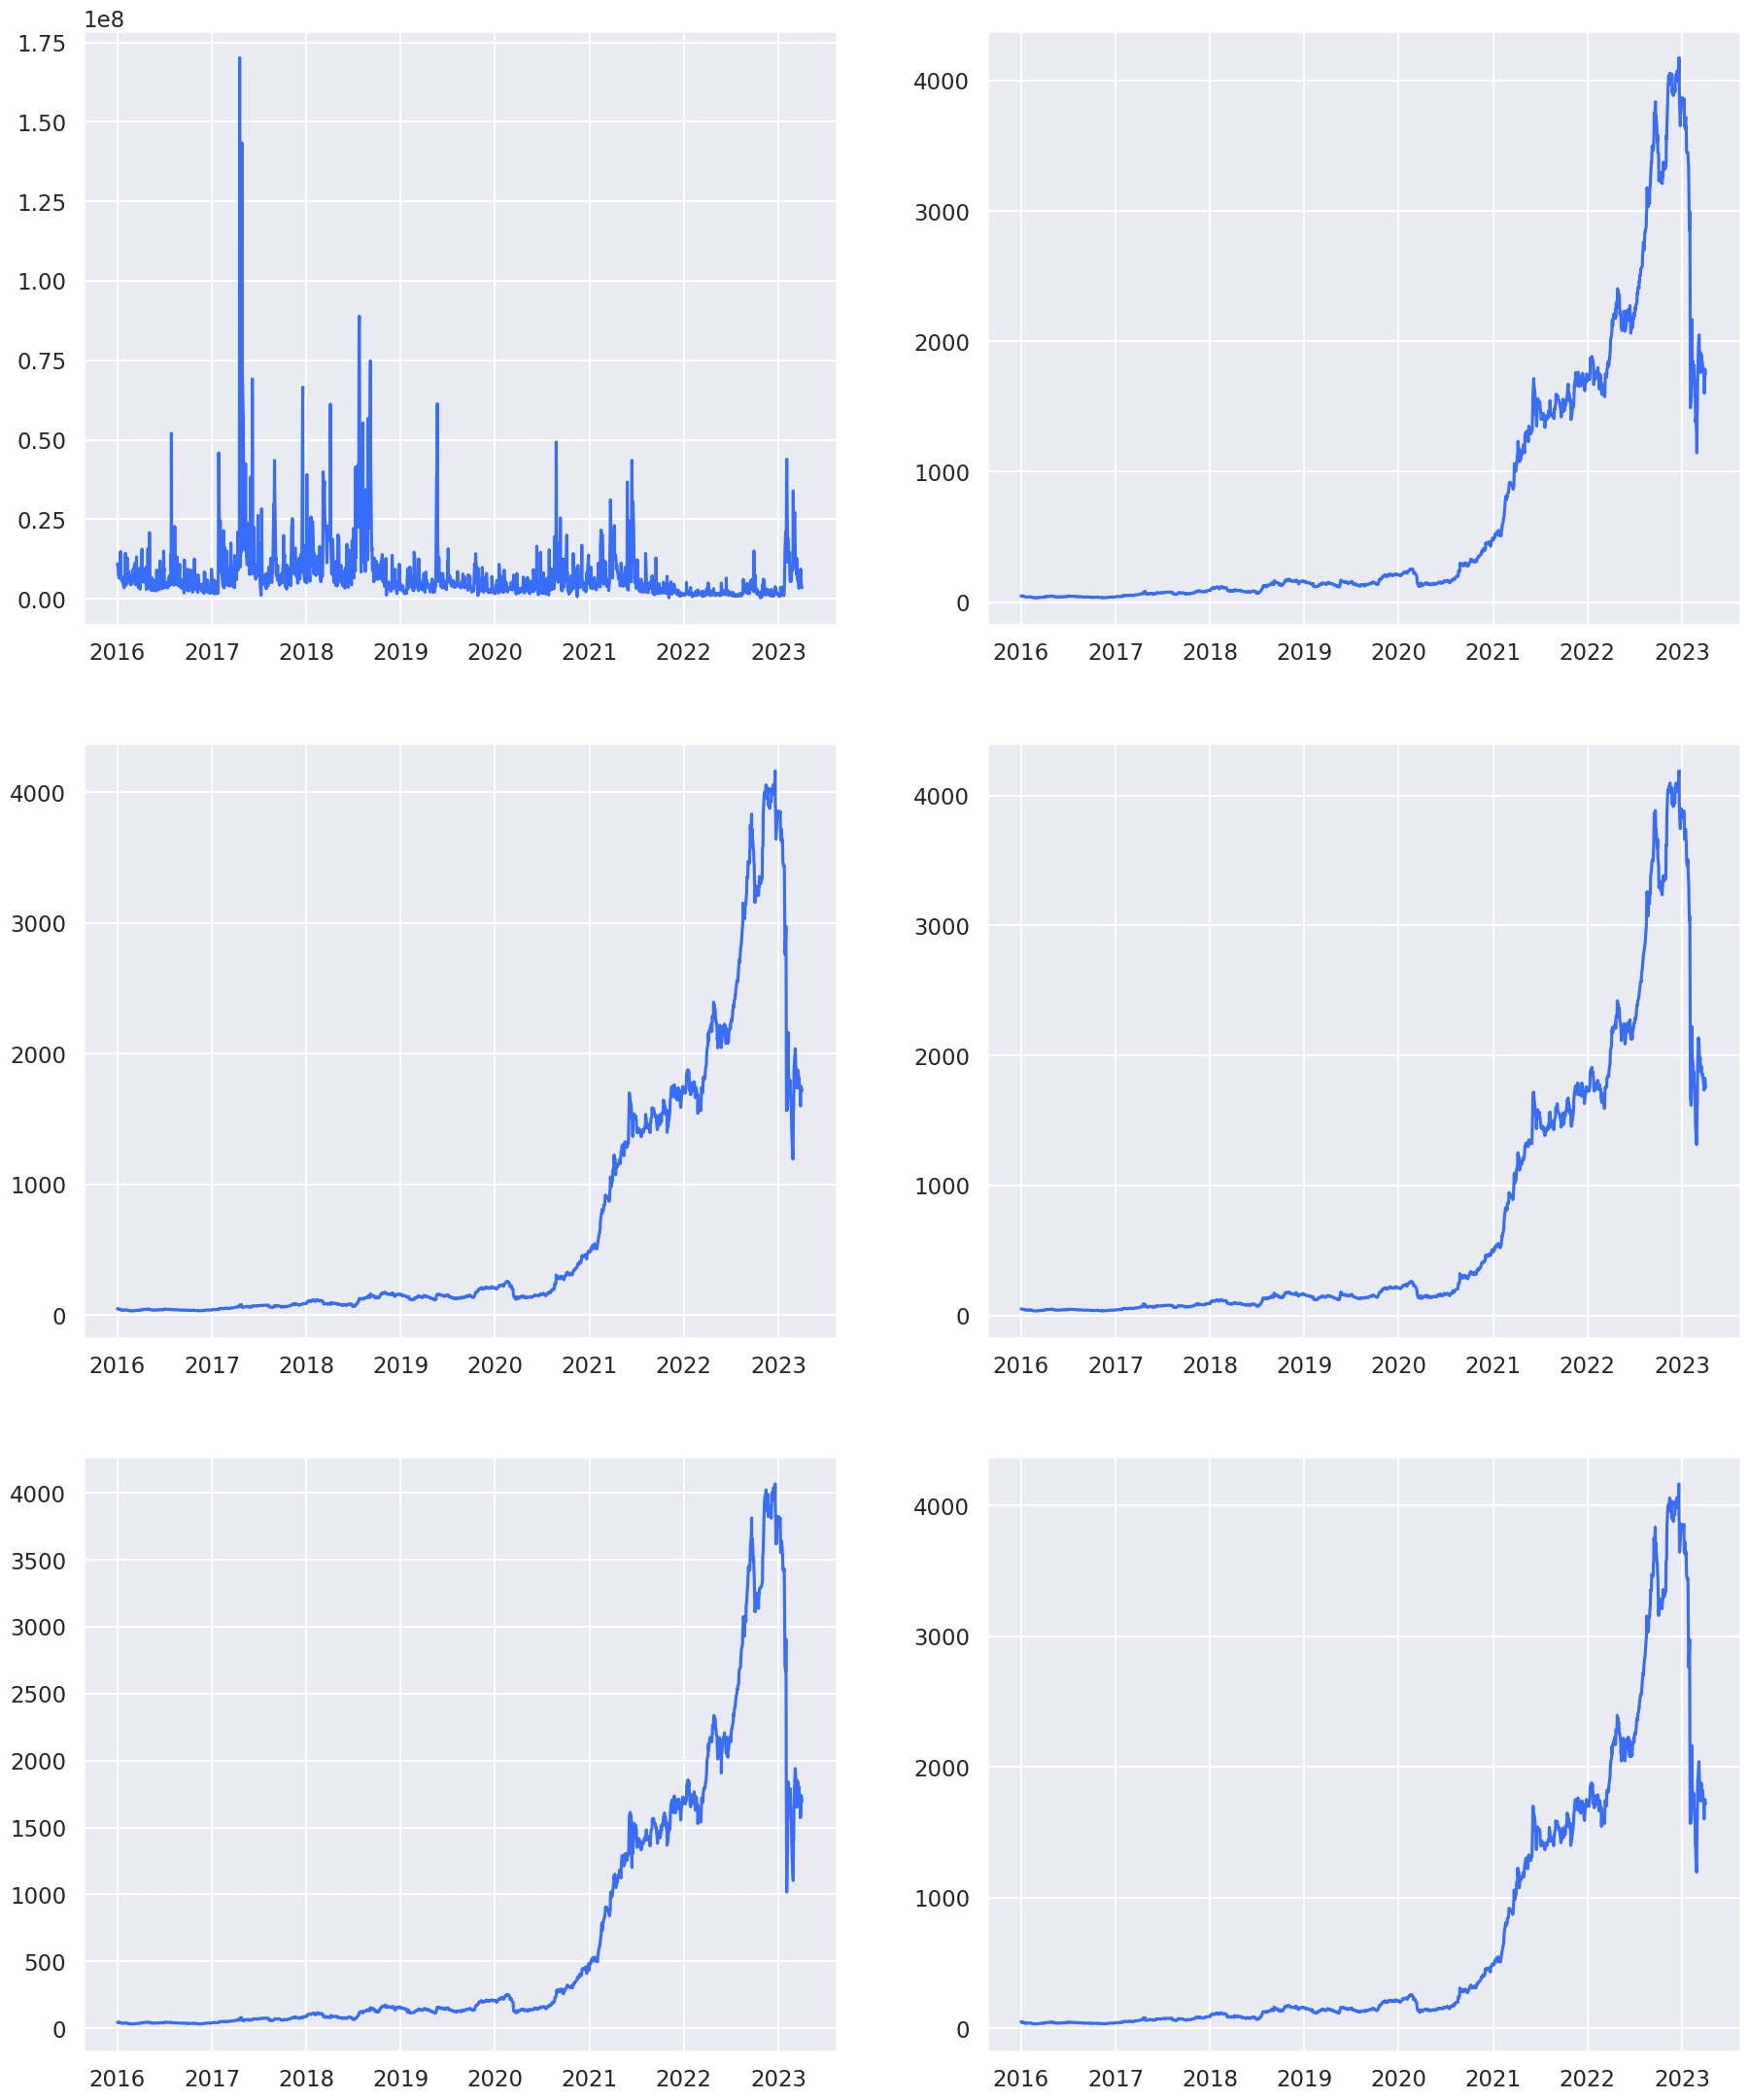

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(22,27))
ax[0,0].plot(df['Volume'])
ax[0,1].plot(df['Open'])
ax[1,0].plot(df['Close'])
ax[1,1].plot(df['High'])
ax[2,0].plot(df['Low'])
ax[2,1].plot(df['Adj Close'])
plt.show()

In [ ]:
data_vol=data['Volume']

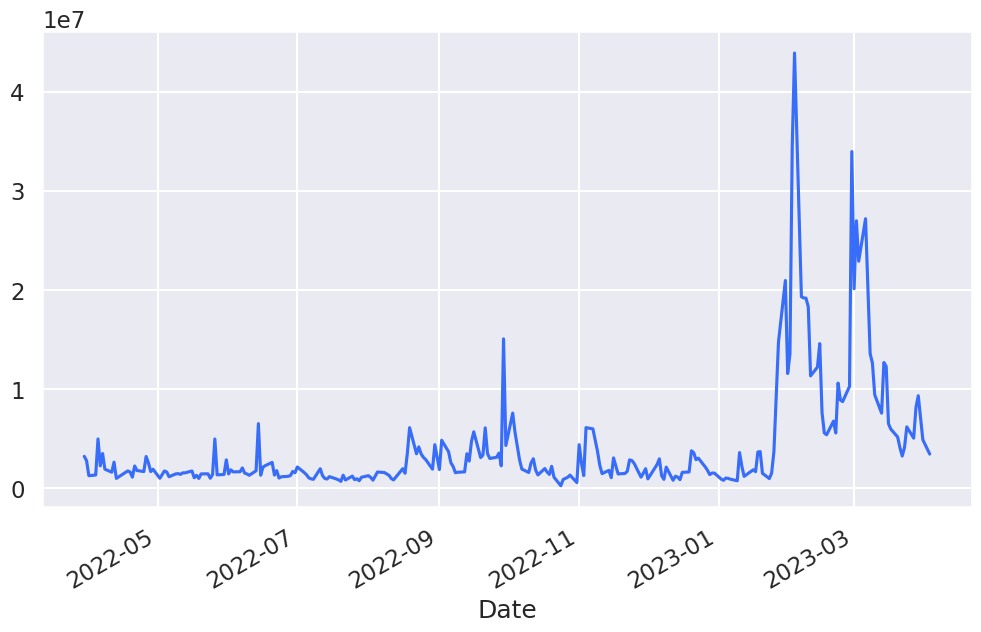

In [ ]:
fig=plt.figure(figsize=(12,7))
data_vol.tail(252).plot()
plt.show()

In [ ]:
data_model=pd.DataFrame()
data_model['pct_change_vol']=data_vol.pct_change()
#the reseon to chose this as a variable to input my lstm as change in volume of a stock can show how people are responding to that campany
data_model

,pct_change_vol
Date,
2016-01-01,NaN
2016-01-04,-0.141824
2016-01-05,0.041753
2016-01-06,-0.276313
2016-01-07,0.257361
...,...
2023-03-27,-0.183406
2023-03-28,0.611872
2023-03-29,0.145837


In [ ]:
data_model['Close']=data['Close']
data_model['Open']=data['Open']
data_model['pct_change_open']=data['Open'].pct_change()
data_model['pct_change_close']=data['Close'].pct_change()

In [ ]:
data_model

,pct_change_vol,Close,Open,pct_change_open,pct_change_close
Date,,,,,
2016-01-01,NaN,49.095600,45.553741,NaN,NaN
2016-01-04,-0.141824,46.371094,48.768658,0.070574,-0.055494
2016-01-05,0.041753,48.278248,46.670792,-0.043017,0.041128
2016-01-06,-0.276313,46.997730,47.951309,0.027437,-0.026524
2016-01-07,0.257361,43.564854,46.262115,-0.035227,-0.073043
...,...,...,...,...,...
2023-03-27,-0.183406,1723.050049,1740.650024,-0.030818,-0.010111
2023-03-28,0.611872,1600.849976,1727.949951,-0.007296,-0.070921
2023-03-29,0.145837,1740.400024,1602.949951,-0.072340,0.087172


In [ ]:
# data_model.info()
data.head(10)
data_model['HO']=data['High']-data['Open']
data_model['HC']=data['High']-data['Close']
data_model['CL']=data['Close']-data['Low']
data_model['OL']=data['Open']-data['Low']
data_model['HL']=data['High']-data['Low']
data_model['OC']=data['Open']-data['Close']
data_model


,pct_change_vol,Close,Open,pct_change_open,pct_change_close,HO,HC,CL,OL,HL,OC
Date,,,,,,,,,,,
2016-01-01,NaN,49.095600,45.553741,NaN,NaN,3.868801,0.326942,4.222984,0.681126,4.549927,-3.541859
2016-01-04,-0.141824,46.371094,48.768658,0.070574,-0.055494,1.389500,3.787064,0.463165,2.860729,4.250229,2.397564
2016-01-05,0.041753,48.278248,46.670792,-0.043017,0.041128,2.152359,0.544903,2.397564,0.790108,2.942467,-1.607456
2016-01-06,-0.276313,46.997730,47.951309,0.027437,-0.026524,0.517654,1.471233,0.517654,1.471233,1.988888,0.953579
2016-01-07,0.257361,43.564854,46.262115,-0.035227,-0.073043,0.000000,2.697262,1.062557,3.759819,3.759819,2.697262
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,-0.183406,1723.050049,1740.650024,-0.030818,-0.010111,16.750000,34.349976,41.050049,58.650024,75.400024,17.599976
2023-03-28,0.611872,1600.849976,1727.949951,-0.007296,-0.070921,5.050049,132.150024,27.849976,154.949951,160.000000,127.099976
2023-03-29,0.145837,1740.400024,1602.949951,-0.072340,0.087172,153.050049,15.599976,149.300049,11.849976,164.900024,-137.450073


In [ ]:
# fig=plt.figure(figsize=(12,7))
# data['Close'].plot()
# plt.show()
data_model.dropna(inplace=True,axis=0)
data_model

,pct_change_vol,Close,Open,pct_change_open,pct_change_close,HO,HC,CL,OL,HL,OC
Date,,,,,,,,,,,
2016-01-04,-0.141824,46.371094,48.768658,0.070574,-0.055494,1.389500,3.787064,0.463165,2.860729,4.250229,2.397564
2016-01-05,0.041753,48.278248,46.670792,-0.043017,0.041128,2.152359,0.544903,2.397564,0.790108,2.942467,-1.607456
2016-01-06,-0.276313,46.997730,47.951309,0.027437,-0.026524,0.517654,1.471233,0.517654,1.471233,1.988888,0.953579
2016-01-07,0.257361,43.564854,46.262115,-0.035227,-0.073043,0.000000,2.697262,1.062557,3.759819,3.759819,2.697262
2016-01-08,-0.281382,44.681900,44.681900,-0.034158,0.025641,0.544903,0.544903,0.735615,0.735615,1.280518,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,-0.183406,1723.050049,1740.650024,-0.030818,-0.010111,16.750000,34.349976,41.050049,58.650024,75.400024,17.599976
2023-03-28,0.611872,1600.849976,1727.949951,-0.007296,-0.070921,5.050049,132.150024,27.849976,154.949951,160.000000,127.099976
2023-03-29,0.145837,1740.400024,1602.949951,-0.072340,0.087172,153.050049,15.599976,149.300049,11.849976,164.900024,-137.450073


In [ ]:
y=pd.DataFrame()
y['Open']=data['Open']
y['Close']=data['Close']
y

,Open,Close
Date,,
2016-01-01,45.553741,49.095600
2016-01-04,48.768658,46.371094
2016-01-05,46.670792,48.278248
2016-01-06,47.951309,46.997730
2016-01-07,46.262115,43.564854
...,...,...
2023-03-27,1740.650024,1723.050049
2023-03-28,1727.949951,1600.849976
2023-03-29,1602.949951,1740.400024


In [ ]:
# data_model.dropna(inplace=True,axis=0)
# data_model.columns.shape[0]
# y=[]
# y.append(data_model.iloc[1,1:3])
y_data=pd.DataFrame()
y_data['Open']=data_model['Open']
y_data['Close']=data_model['Close']

In [ ]:
print(y_data.iloc[42,:])

Open     34.328777
Close    34.056328
Name: 2016-03-03 00:00:00, dtype: float64


In [ ]:
x=[]
x.append(data_model.iloc[0:42,:])
print(type(x))

<class 'list'>


In [ ]:
data_model
n_steps=21
n_features=data_model.columns.shape[0]
X = []
y = []
for i in np.arange(n_steps, len(data_model)):
    X.append(data_model.iloc[i-n_steps:i, :])
    y.append(y_data.iloc[i,:])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], n_steps, n_features))
print(X.shape)
print(y.shape)

(1771, 21, 11)
(1771, 2)


In [ ]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Bidirectional

# model = Sequential()

# # First LSTM layer with 64 units
# model.add(Bidirectional(LSTM(units=32, return_sequences=True, input_shape=(n_steps, n_features),use_bias=True)))
# model.add
# # Second LSTM layer with 64 units
# model.add(Bidirectional(LSTM(units=64, return_sequences=True,use_bias=True)))

# # Third LSTM layer with 2 units
# model.add(Bidirectional(LSTM(units=32,use_bias=True)))

# # Output layer with 1 dense unit and sigmoid activation for binary classification
# model.add(Dense(units=2, activation='linear'))

# # Compile the model with binary cross-entropy loss and Adam optimizer
# model.compile(loss='huber', optimizer='adam', metrics=['accuracy','mean squared error','mean absolute error','R-squared', 'precision', 'recall', 'f1-score', 'AUC'])
# # model.summary()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, LeakyReLU

model = Sequential()

# First LSTM layer with 32 units and LeakyReLU activation function
model.add(Bidirectional(LSTM(units=200, return_sequences=True, input_shape=(n_steps, n_features), use_bias=True)))
model.add(LeakyReLU(alpha=0.01))

# Second LSTM layer with 64 units and LeakyReLU activation function
model.add(Bidirectional(LSTM(units=100, return_sequences=True, use_bias=True)))
model.add(LeakyReLU(alpha=0.01))

# Third LSTM layer with 32 units
model.add(Bidirectional(LSTM(units=50, use_bias=True)))

# Output layer with 2 dense units and linear activation function for regression
model.add(Dense(units=2, activation='linear'))

# Compile the model with mean squared error loss and Adadelta optimizer
model.compile(loss='huber', optimizer='Adadelta', metrics=['accuracy','mse','mae'])
# model.build()
# Print the model summary
# model.summary()


In [ ]:
model

In [ ]:
history = model.fit(X, y, epochs=100, batch_size=10)
# history = model.fit(X, y, epochs=100, batch_size=12, validation_data=(X, y))

Epoch 1/100
178/178 [==============================] - 41s 165ms/step - loss: 722.3539 - accuracy: 0.4941 - mse: 1578151.3750 - mae: 722.8541
Epoch 2/100
178/178 [==============================] - 20s 112ms/step - loss: 722.1879 - accuracy: 0.4941 - mse: 1577910.6250 - mae: 722.6879
Epoch 3/100
178/178 [==============================] - 19s 104ms/step - loss: 721.9611 - accuracy: 0.4941 - mse: 1577590.8750 - mae: 722.4611
Epoch 4/100
178/178 [==============================] - 19s 109ms/step - loss: 721.6643 - accuracy: 0.4941 - mse: 1577169.5000 - mae: 722.1643
Epoch 5/100
178/178 [==============================] - 19s 109ms/step - loss: 721.2694 - accuracy: 0.4941 - mse: 1576618.7500 - mae: 721.7694
Epoch 6/100
178/178 [==============================] - 20s 110ms/step - loss: 720.7604 - accuracy: 0.4941 - mse: 1575899.1250 - mae: 721.2604
Epoch 7/100
178/178 [==============================] - 19s 109ms/step - loss: 720.1426 - accuracy: 0.4941 - mse: 1575021.8750 - mae: 720.6426
Epoch 

In [ ]:
y_predit=model.predict(x)

ValueError: ignored

In [ ]:
fig=plt.figure(figsize=(12,7))
plt.plot(y)
plt.plot(y_predit)
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(64))
model.add(Dense(2))

model.compile(optimizer='adam', loss='mse')


In [ ]:
# data_model.iloc[data_model=np.inf]
# print(data_model.iloc[42-n_steps:42, :])
# print(y)

In [ ]:
# fig=plt.figure(figsize=(12,9))
# sns.scatterplot(x=data_model.index,y=y['Close'])
# plt.show()
y

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense 

# # Define the LSTM model
# model = Sequential()

# # Add the input layer
# model.add(LSTM(11, input_shape=(42, 11)))

# # Add the hidden layer

# # Add the output layer
# model.add(Dense(2))

# # Compile the model
# model.compile(loss='mse', optimizer='adam')

# # Print the model summary
# model.fit(X,y,epochs=50)
# y_predict=model.predict(X)



In [ ]:


# Define the number of time steps and features
timesteps = 60
features = 1

# Convert the data into the right format
def create_sequences(data):
    x = []
    y = []
    for i in range(len(data) - timesteps):
        x.append(data[i:i+timesteps])
        y.append(data[i+timesteps])
    x = np.array(x)
    y = np.array(y)
    return x, y

train_x, train_y = create_sequences(train_data)
test_x, test_y = create_sequences(test_data)

train_x = np.reshape(train_x, (train_x.shape[0], timesteps, features))
test_x = np.reshape(test_x, (test_x.shape[0], timesteps, features))


In [ ]:
y_predict

In [ ]:
import numpy as np

# Generate a sample dataframe with 11 columns and 100 rows
data_ = np.random.rand(100, 11)

# Define the number of timesteps and features
n_steps = 42
n_features = 11

# Reshape the data into a 3D array
X = []
y = []
for i in range(n_steps, len(data_)):
    X.append(data_[i-n_steps:i, :])
    y.append(data_[i, :2])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], n_features))
print(X.shape)
print(y.shape)
# Define the model architecture
model = Sequential()
model.add(LSTM(units=3, input_shape=(n_steps, n_features)))
model.add(Dense(units=2))

# # Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
model.fit(X, y, epochs=50, batch_size=16)


In [ ]:
data_model.info()

In [ ]:
|